In [ ]:
!pip install missingno

In [9]:
import missingno
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [5]:
dataset  = Path('../data/raw/installs.csv')
installs = (pd.read_csv(dataset, parse_dates=['created'])
              .assign(created = lambda df: (df.created.dt.floor('h')
                                                      .dt.tz_localize('UTC')
                                                      .dt.tz_convert('America/Montevideo')),
                      weekend = lambda df: df.created.dt.weekday.map(lambda wd: 1 if wd in [5,6] else 0)))

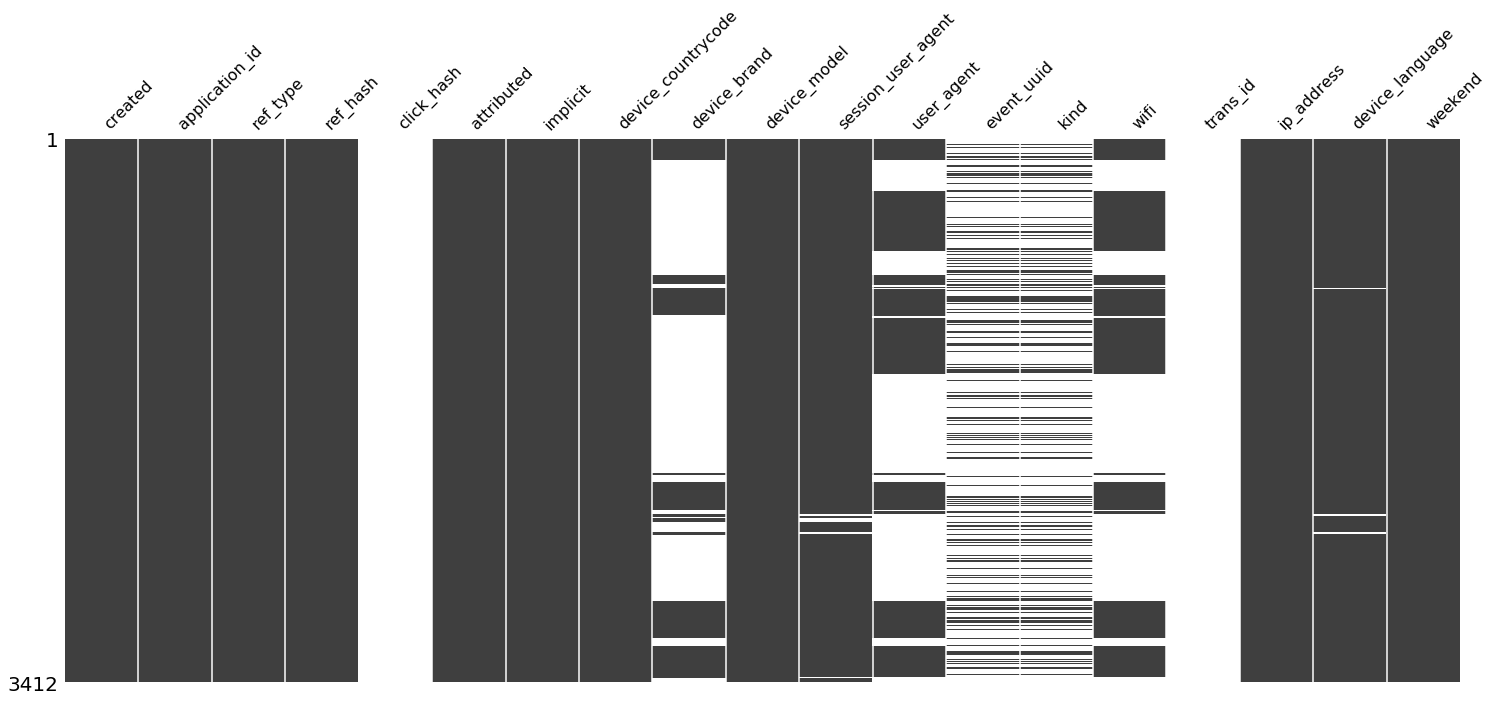

In [12]:
missingno.matrix(installs, sparkline=False)
plt.savefig('../assets/installs_missingno.png', bbox_inches='tight')